In [1]:
import pandas as pd
import datetime
import os
import pytz
utc = pytz.utc
AZtz = pytz.timezone("US/Arizona")

#import the diffrent data frames for each data stream

listofDataFiles = ["appleWatch6pillowSleepStages", "fitbitSleepStages", "ouraRingSleepStages", "withingsBedSleepStages", "amazonHaloSleepStages"]

deviceNames = ["apple watch", "fitbit", "oura", "withings", "halo"]

dfs = []

for fn in listofDataFiles:
    dfs.append(pd.read_parquet(fn + ".parquet.gzip"))



In [2]:
earliestDay = min([i.index[0].astimezone(AZtz) for i in dfs]).date()
latestDay = max([i.index[len(i)-1].astimezone(AZtz) for i in dfs]).date()

print(earliestDay)
print(latestDay)

daylist = [earliestDay]
i = 0
while daylist[i] != latestDay:
    i = i + 1
    daylist.append(earliestDay + datetime.timedelta(days=i))
    

print(len(daylist))



2020-05-13
2021-08-09
454


In [4]:
#for every day I want to collect a few nested lists
#[day,[oura,[[times],[values]]],halo[]]]
alldataList = []
for day in daylist:
    print(day)
    thisDaylist = []
    thisDaylist.append(day)
    allDeviceDat = []
    active = [0] * len(deviceNames)
    for devicei in range(len(deviceNames)):
        deviceDat = []
        deviceDat.append(deviceNames[devicei])
        atimel = []
        astagel = []
        for group in dfs[devicei].groupby(dfs[devicei].index.date):
            #print(group[1])
            if group[0] == day:
                #print(group)
                timel = [k.astimezone(AZtz) for k in group[1].index.to_list()]
                stagel = group[1]['stage'].to_list()
                etimel = [k.astimezone(AZtz) for k in group[1]['endTimestamp'].to_list()]

                #I want to zip together these lists
                for i in range(len(timel)):
                    atimel.append(timel[i])
                    atimel.append(etimel[i])
                    astagel.append(stagel[i])
                    astagel.append(stagel[i])
                active[devicei] = 1
                
        deviceDat.append(atimel)
        deviceDat.append(astagel)
        allDeviceDat.append(deviceDat)
    thisDaylist.append(allDeviceDat)
    thisDaylist.append(active)
    alldataList.append(thisDaylist)

#print(alldataList)


2020-05-13
2020-05-14
2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19
2020-05-20
2020-05-21
2020-05-22
2020-05-23
2020-05-24
2020-05-25
2020-05-26
2020-05-27
2020-05-28
2020-05-29
2020-05-30
2020-05-31
2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30
2020-07-01
2020-07-02
2020-07-03
2020-07-04
2020-07-05
2020-07-06
2020-07-07
2020-07-08
2020-07-09
2020-07-10
2020-07-11
2020-07-12
2020-07-13
2020-07-14
2020-07-15
2020-07-16
2020-07-17
2020-07-18
2020-07-19
2020-07-20
2020-07-21
2020-07-22
2020-07-23
2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01
2020-08-02
2020-08-03
2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11

In [4]:
for i in alldataList[0]:
    print(i)
    print("****************")

2020-05-13
****************
[['apple watch', [], []], ['fitbit', [Timestamp('2020-05-13 13:43:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 13:45:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:41:00-0700', tz='US/Arizona'), Timestamp('2020-05-13 14:42:00-0700', tz='US/Arizona')], [0.0, 1.0, 0.0, 1.0]], ['oura', [], []], ['withings', [], []], ['halo', [], []]]
****************
[0, 1, 0, 0, 0]
****************


In [6]:
#I want to see how many days there are wich devices
#[[day,data,active]] totalactivities = []
#i think i want a new data frame that i can add columns to one for graphable raw data and one for metadata both indexed by dates

datadfColumns = ['date'] + deviceNames
datadf = pd.DataFrame(columns = datadfColumns)
datadf.set_index('date',inplace=True)

for i in range(len(alldataList)):
    thisRow = alldataList[i]
    datadf.loc[thisRow[0]] = [[thisRow[1][j][1],thisRow[1][j][2]] for j in range(len(deviceNames))]
    #print(datadf.loc[thisRow[0]])



metadatadfColumns = ['date', 'deviceActivity']
metadatadf = pd.DataFrame(columns = metadatadfColumns)
metadatadf.set_index('date',inplace=True)

for i in range(len(alldataList)):
    thisRow = alldataList[i]
    #print(thisRow[0])
    #print(thisRow[2])
    metadatadf.loc[thisRow[0]] = [thisRow[2]]

totalActivity = [sum(x) for x in metadatadf.iloc[:]['deviceActivity']]

metadatadf['totalActivity'] = totalActivity

In [7]:
#calculate total activity column and add to the df
print(metadatadf.sort_values(by=['totalActivity'], ascending=False).head(2))

             deviceActivity  totalActivity
date                                      
2021-08-09  [1, 1, 1, 1, 1]              5
2021-08-08  [1, 1, 1, 1, 1]              5


In [8]:
print(totalActivity.count(5))
print(totalActivity.count(4))
print(totalActivity.count(3))
print(totalActivity.count(2))
print(totalActivity.count(1))

3
34
204
58
155


In [9]:
for devicei in range(len(deviceNames)):
    print(deviceNames[devicei])
    print(sum([x[devicei] for x in metadatadf.iloc[:]['deviceActivity']]))

apple watch
17
fitbit
453
oura
289
withings
112
halo
163


In [10]:
#let's see what those 36 days where we have 4 or more sleep ata streams look like
daysDev4pmetaDF = metadatadf.sort_values(by=['totalActivity'], ascending=False).head(36).sort_index(ascending=False)
#print(daysDev4pmetaDF)
fourPlusDeviceDays = daysDev4pmetaDF.index.to_list()


daysDev3pmetaDF = metadatadf.sort_values(by=['totalActivity'], ascending=False).head(239).sort_index(ascending=False)

threePlusDeviceDays = daysDev3pmetaDF.index.to_list()

[Timestamp('2021-08-01 00:00:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 03:59:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 04:02:00-0700', tz='US/Arizona'), Timestamp('2021-08-01 04:09:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 04:24:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 04:32:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 04:41:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 04:47:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 05:10:00-0700', tz='US/Arizona'), Timestamp('2021-08-01 05:15:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 05:33:00-0700', tz='US/Arizona'), Timestamp('2021-08-01 06:06:00-0700', tz='US/Arizona'), Timestamp('2021-08-01 06:25:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 06:45:00-0700', tz='US/Arizona'), Timestamp('2021-08-01 07:05:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 07:13:00-0700', tz='US/Arizona'), Timestamp('2021-08-01 07:54:30-0700', tz='US/Arizona'), Timestamp('2021-08-01 07:59:30-0700', tz='US/Ar

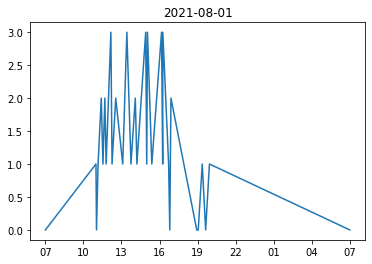

In [58]:
import matplotlib.pyplot as plt
import matplotlib

testDayi = 8

#title the name of the day
plt.title(fourPlusDeviceDays[testDayi])

startDatetime = datetime.datetime.combine(fourPlusDeviceDays[testDayi], datetime.datetime.min.time())
startTimestamp = datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0][0] - datetime.timedelta(hours=datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0][0].hour, minutes=datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0][0].minute)
testTimeList = [startTimestamp] + datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][0] + [startTimestamp + datetime.timedelta(hours=23,minutes=59)]

testValueList = [0] + datadf.loc[fourPlusDeviceDays[testDayi]]['fitbit'][1] + [0]

print(testTimeList)
print(testValueList)

plt.plot(testTimeList,testValueList)
#plt.plot(bottomX,invizY)
#plt.gcf().autofmt_xdate()
ax=plt.gca()
xfmt = matplotlib.dates.DateFormatter('%H')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date("US/Arizona")

plt.show()

In [73]:
theDate = fourPlusDeviceDays[2]
timestampsabc = datadf.loc[theDate]['fitbit'][0]
dataabc = datadf.loc[theDate]['fitbit'][1]

print(theDate)
print(timestampsabc)

2021-08-07
[Timestamp('2021-08-07 02:39:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 02:40:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:00:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:22:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:31:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:37:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:41:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 03:48:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:03:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:25:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:51:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:52:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 04:58:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 05:26:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 05:38:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 05:41:00-0700', tz='US/Arizona'), Timestamp('2021-08-07 06:01:30-0700', tz='US/Arizona'), Timestamp('2021-08-07 06:27:30-0700'

In [11]:
def d2dt(d,targetTimezone):
    return pytz.timezone(targetTimezone).localize(datetime.datetime.combine(d, datetime.datetime.min.time()))

apple watch	0
fitbit	92
oura	56
withings	80
halo	164


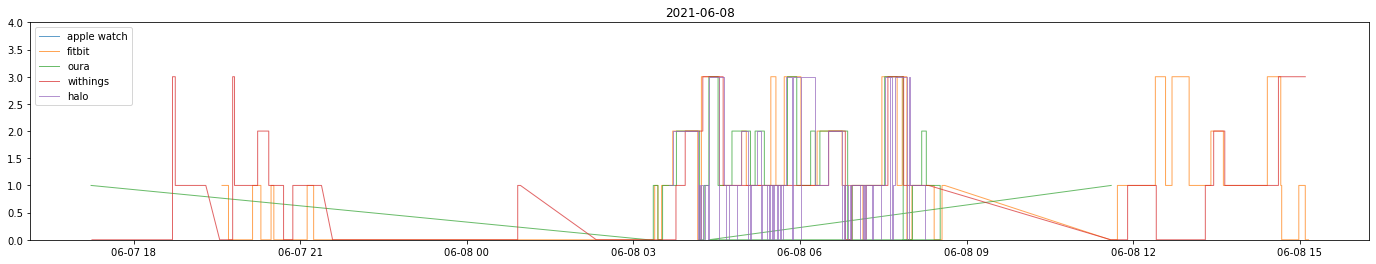

In [26]:
import matplotlib.pyplot as plt
import matplotlib
theDate = fourPlusDeviceDays[30]

#needs theDate
#a list of timestamps
#a list of sleep stages
fig = plt.figure(figsize=(24.0, 4.0))

plt.gca().set_title(theDate)

plt.gca().set_ylim([0,4])

#plt.gca().set_xlim([d2dt(theDate, 'US/Arizona'), d2dt(theDate, 'US/Arizona') + datetime.timedelta(days=1)])
#plt.gca().xaxis_date('US/Arizona')
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))

for i in range(len(deviceNames)):
    print(deviceNames[i] + "\t" + str(len(datadf.loc[theDate][deviceNames[i]][0])))
    plt.plot(datadf.loc[theDate][deviceNames[i]][0], datadf.loc[theDate][deviceNames[i]][1], label =deviceNames[i], alpha=0.7, linewidth=1)


plt.legend()
plt.show()



In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

#make a generic graphing function where you can pass in a day and it'll graph all the devices
def graphSleepData(day, ddf):
    #set up plot
    plt.title(day)

    for devicei in range(len(deviceNames)):
        #add this line to the plot and legend
        #insted of times they will be indicies to change to the value
        timelist = ddf.loc[day][deviceNames[devicei]][0]
        valueslist = ddf.loc[day][deviceNames[devicei]][1]
    plt.show()



In [ ]:
graphSleepData(fourPlusDeviceDays[0], datadf)

#round every timestamp to the minute and convert to an integer for graphing

In [12]:
#I have the data in the form of start and end times and sleep level


#I'll make noon to noon graphs
#the height of the graphs will be the sleep stage and color and opacity can be the diffrent streams

#i'll want to get an idea of what days have the most overalpping data
#i'll make a list of dates that I am interested in
#for each day in that list I'll add the name of any of the datastreams that 

#for every day
    #make an empty list
    #for every dataframe
        #make an empty lits
        #append all of the sleep stages for that df for that day
        #append to the list for that day

#start exploring how many days have overlapping data
#see what kind of subsets of data can be used to 
